In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Mean of central tendency

In [3]:
df = pd.DataFrame({'movie': ['a', 'b', 'c', 'a', 'b', 'c', 'a', 'b', 'c'],
                  'rating': [9,7,6,9,5,7,8,9,5]})

In [4]:
df.mean(numeric_only=True)

rating    7.222222
dtype: float64

In [5]:
df.rating.mean()

7.222222222222222

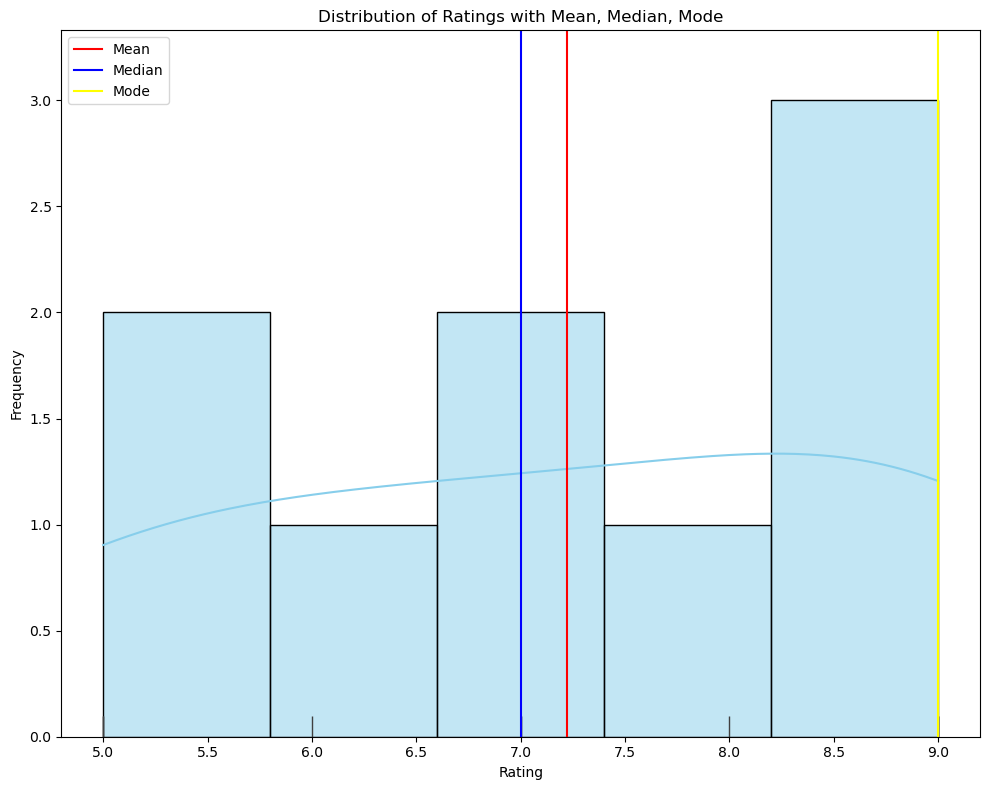

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))
# Histogram + KDE
sns.histplot(data=df, x='rating', kde=True, color='skyblue', edgecolor='black', ax=ax)

# Rug marks
sns.rugplot(data=df, x='rating', height=0.03, color='0.25', ax=ax)

# Mean/ median/ mode
plt.axvline(np.mean(df.rating), color = 'red', linestyle='-', label = 'Mean')
plt.axvline(np.median(df.rating), color='blue', linestyle='-', label = 'Median')
plt.axvline(df.rating.mode()[0], color='yellow', linestyle='-', label = 'Mode')

ax.set_title('Distribution of Ratings with Mean, Median, Mode')
ax.set_xlabel('Rating')
ax.set_ylabel('Frequency')
ax.legend()
plt.tight_layout()
plt.show()

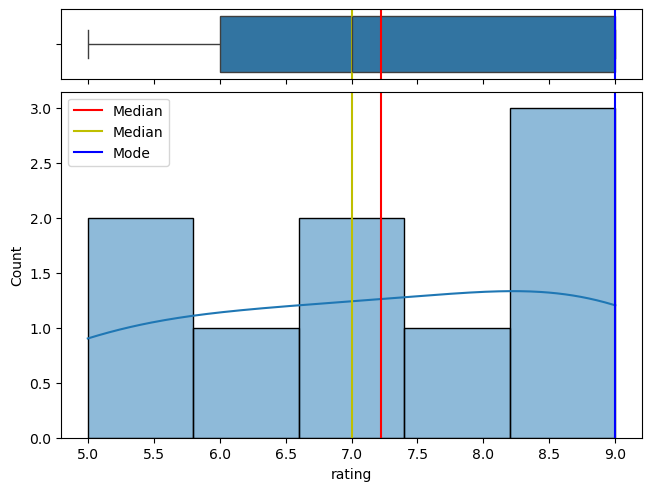

In [7]:
f, (ax_box, ax_hist) = plt.subplots(nrows = 2,
                                    sharex = True,
                                    gridspec_kw = {'height_ratios':[0.2, 1]},
                                    layout = 'constrained')
mean = np.mean(df.rating)
median = np.median(df.rating)
mode = df.rating.mode().values[0]

sns.boxplot(data = df, x = 'rating', ax = ax_box)
ax_box.axvline(mean, color = 'r', linestyle = '-')
ax_box.axvline(median, color = 'y', linestyle = '-')
ax_box.axvline(mode, color = 'b', linestyle = '-')

sns.histplot(data = df, x = 'rating', ax = ax_hist, kde =True)
ax_hist.axvline(mean, color = 'r', linestyle = '-', label = 'Median')
ax_hist.axvline(median, color = 'y', linestyle = '-', label = 'Median')
ax_hist.axvline(mode, color = 'b', linestyle = '-', label = 'Mode')

ax_hist.legend()
ax_box.set(xlabel = '')
plt.show()

In [8]:
df.rating.var()

2.6944444444444446

In [9]:
df.rating.std()

1.6414763002993509

In [10]:
group_mean = df.groupby(['movie'])['rating'].mean()
group_std = df.groupby(['movie'])['rating'].std()
print('Mean of rating group by movie', group_mean)
print('Std of rating group by movie', group_std)

Mean of rating group by movie movie
a    8.666667
b    7.000000
c    6.000000
Name: rating, dtype: float64
Std of rating group by movie movie
a    0.57735
b    2.00000
c    1.00000
Name: rating, dtype: float64


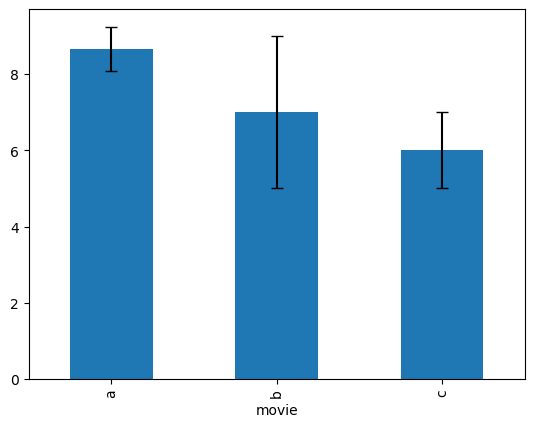

In [11]:
fig, ax = plt.subplots()
group_mean.plot.bar(yerr=group_std, ax=ax, capsize=4)
plt.show()

In [12]:
# Mean of spread

In [13]:
df1 = pd.DataFrame({'pop_sample': range(20)})

In [14]:
df1.sample(5).mean()

pop_sample    9.0
dtype: float64

In [15]:
df1.sample(10).mean()

pop_sample    9.5
dtype: float64

In [16]:
df1.mean()

pop_sample    9.5
dtype: float64

In [17]:
from scipy import stats
stats.sem(df1)

array([1.32287566])

C:\Users\ntx05\AppData\Local\Temp\ipykernel_20276\3915789222.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df2,


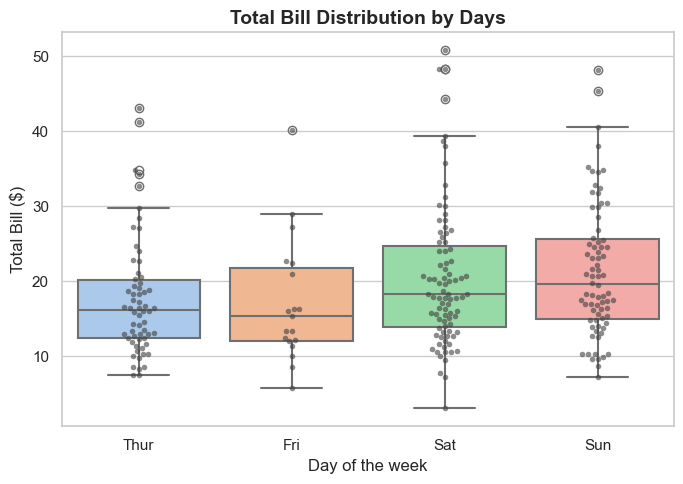

In [18]:
df2 = sns.load_dataset('tips')
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots(figsize = (7, 5))

sns.boxplot(data = df2, 
            x='day', 
            y='total_bill', 
            ax = ax, 
            linewidth = 1.5, 
            palette='pastel')

sns.swarmplot(data = df2, 
          x='day', 
          y='total_bill', 
          color='0.25', 
          size=4, 
          alpha=0.6, 
          ax=ax)
ax.set_title('Total Bill Distribution by Days', fontsize=14, weight='bold')
ax.set_xlabel('Day of the week')
ax.set_ylabel('Total Bill ($)')
plt.tight_layout()
plt.show()

In [19]:
print(df2['total_bill'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05     9.5575
0.25    13.3475
0.50    17.7950
0.75    24.1275
0.95    38.0610
Name: total_bill, dtype: float64


In [20]:
print(df2['total_bill'].quantile(0.75) - df2['total_bill'].quantile(0.25))

10.779999999999998


In [21]:
# Correlations and covariance

In [22]:
df3 = sns.load_dataset('iris')

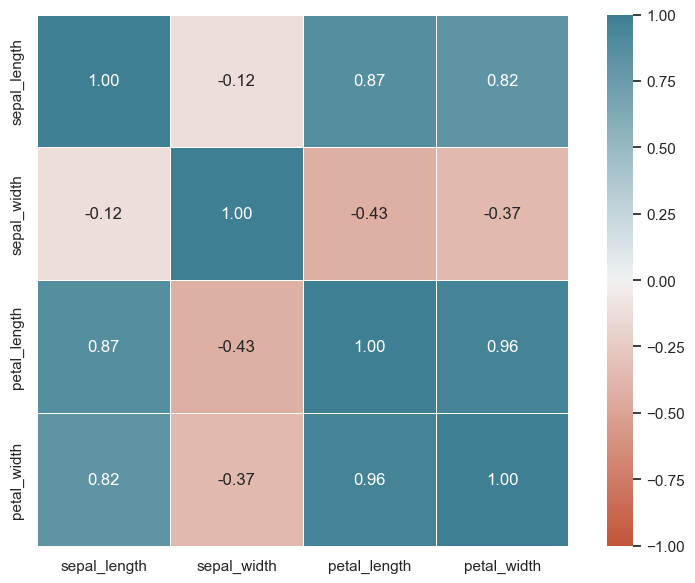

In [23]:
fig, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(df3.corr(numeric_only = True), 
                 vmin = -1, 
                 vmax = 1, 
                 center = 0, 
                 cmap = sns.diverging_palette(20, 220, as_cmap = True), 
                 annot = True, 
                 fmt = '.2f', 
                 square = True,
                 linewidths = 0.5,
                 ax = ax)
plt.tight_layout()
plt.show()

In [24]:
a = [11,12,22,11]
b = [7,8,9,10]
c = [10,11,22,23]
arr = np.array([a,b,c])

In [25]:
cov_matrix = np.cov(arr, bias=True)

In [26]:
cov_matrix

array([[21.5 ,  1.25, 13.75],
       [ 1.25,  1.25,  6.25],
       [13.75,  6.25, 36.25]])

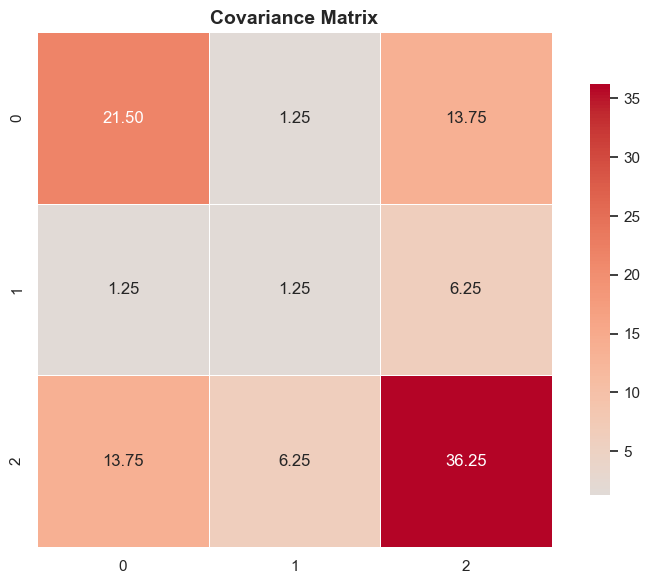

In [27]:
fig, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(cov_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap= 'coolwarm', 
            center=0, 
            square=True, 
            cbar_kws={'shrink': .8}, 
            linewidths = 0.5,
            ax=ax)
plt.title('Covariance Matrix', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

In [28]:
# Distributions

In [30]:
df.skew(numeric_only=True)

rating   -0.23507
dtype: float64

In [31]:
df.kurtosis(numeric_only=True)

rating   -1.570351
dtype: float64

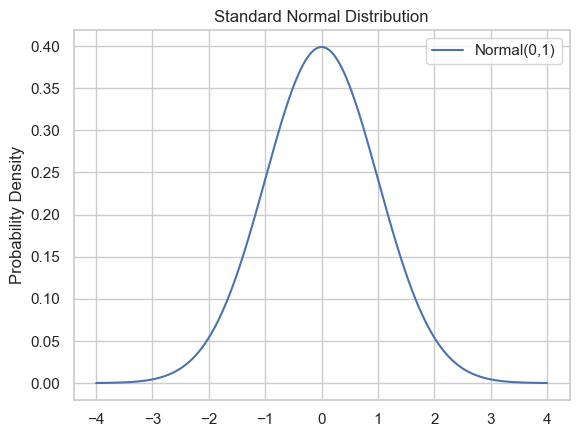

In [32]:
x = np.arange(-4, 4, 0.001) #np.linspace(-4,4,200)
mean = 0.0
std = 1.0
pdf = stats.norm.pdf(x, mean, std)
plt.plot(x, pdf, label='Normal(0,1)')
plt.ylabel('Probability Density')
plt.title('Standard Normal Distribution')
plt.legend()
plt.show()

In [33]:
import pylab
stats.probplot(df3.sepal_length, plot=pylab)

((array([-2.60376328, -2.283875  , -2.1005573 , -1.96875864, -1.86428437,
         -1.77691182, -1.70131573, -1.63435332, -1.57400778, -1.51890417,
         -1.46806125, -1.42075308, -1.37642684, -1.33465133, -1.29508341,
         -1.25744533, -1.22150891, -1.18708433, -1.15401181, -1.12215558,
         -1.0913992 , -1.06164202, -1.03279638, -1.00478546, -0.97754152,
         -0.95100448, -0.92512081, -0.89984257, -0.87512664, -0.85093408,
         -0.8272296 , -0.80398107, -0.78115919, -0.75873709, -0.73669013,
         -0.71499557, -0.69363244, -0.67258128, -0.65182406, -0.63134396,
         -0.61112532, -0.59115349, -0.57141472, -0.55189613, -0.53258558,
         -0.51347162, -0.49454346, -0.47579085, -0.45720409, -0.43877397,
         -0.4204917 , -0.40234892, -0.38433762, -0.36645016, -0.3486792 ,
         -0.33101768, -0.31345882, -0.29599609, -0.27862316, -0.26133393,
         -0.24412247, -0.22698303, -0.20991002, -0.19289797, -0.17594158,
         -0.15903562, -0.142175  , -0.

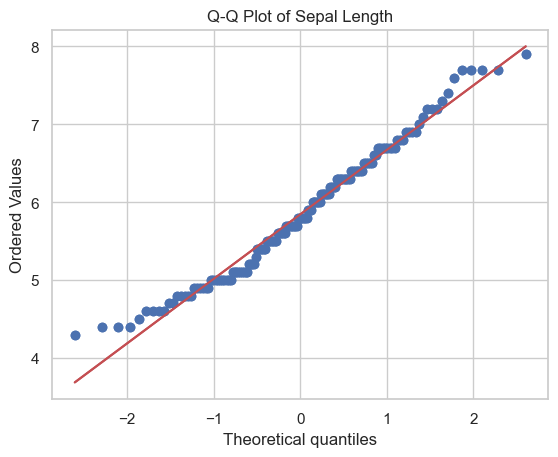

In [34]:
# Q-Q plot for sepal_length
stats.probplot(df3.sepal_length, dist='norm', plot=plt)
plt.title('Q-Q Plot of Sepal Length')
plt.show()

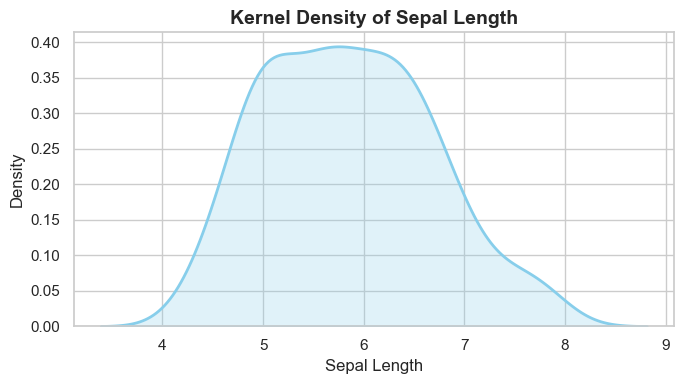

In [35]:
# KDE plot
plt.figure(figsize=(7,4))
sns.kdeplot(df3.sepal_length,
           fill=True,
           color='skyblue',
           linewidth=2)
plt.title('Kernel Density of Sepal Length', fontsize = 14, weight='bold')
plt.xlabel('Sepal Length')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

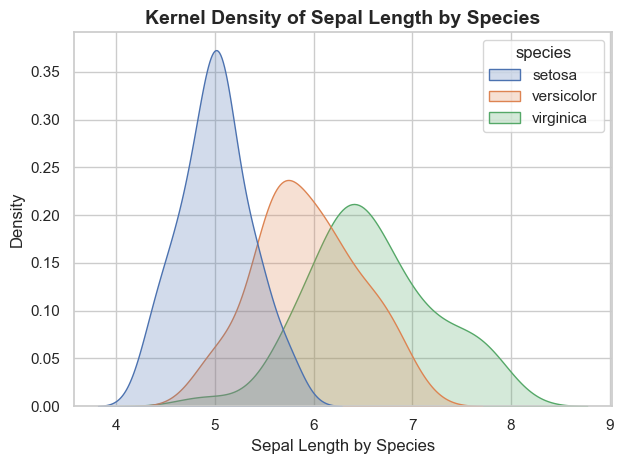

In [36]:
sns.kdeplot(data=df3, x='sepal_length', hue='species', fill=True, common_norm=True)
plt.title('Kernel Density of Sepal Length by Species', fontsize = 14, weight='bold')
plt.xlabel('Sepal Length by Species')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

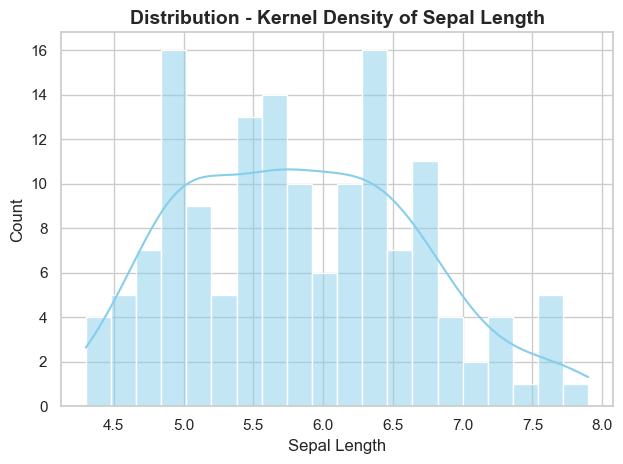

In [37]:
sns.histplot(df3.sepal_length, kde=True, bins=20, color='skyblue')
plt.title('Distribution - Kernel Density of Sepal Length', fontsize = 14, weight='bold')
plt.xlabel('Sepal Length')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

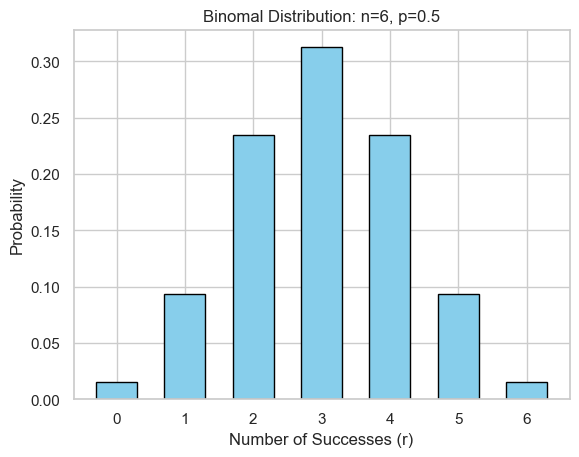

In [38]:
from scipy.stats import  binom
# Parameter
n = 6
p = 0.5
r_value = list(range(n+1))
dist = [binom.pmf(r, n, p) for r in r_value]

plt.figure()
plt.bar(r_value, dist, width=0.6, color='skyblue', edgecolor='black')
plt.xlabel('Number of Successes (r)')
plt.ylabel('Probability')
plt.title(f'Binomal Distribution: n={n}, p={p}')
plt.xticks(r_value)
plt.show()

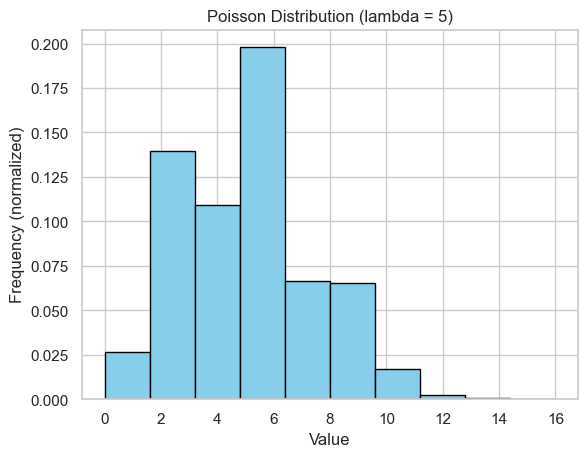

In [39]:
# Generate Poisson random numbers
s = np.random.poisson(5, 10000)
count, bins, ignored = plt.hist(s, bins=10, density=True, color='skyblue', edgecolor='black')
plt.title('Poisson Distribution (lambda = 5)')
plt.xlabel('Value')
plt.ylabel('Frequency (normalized)')
plt.show()

In [40]:
# CLT & Confindence Interval

In [41]:
import statsmodels.stats.api as sms
# Confidence interval for the mean

ci_low, ci_high = sms.DescrStatsW(df3.sepal_length).tconfint_mean() # more consevative for small/medium samples
print(f'95% confidence interval for the mean: [{ci_low:.3f}, {ci_high:.3f}]')

95% confidence interval for the mean: [5.710, 5.977]


In [42]:
# 99% CI
ci_low, ci_high = sms.DescrStatsW(df3.sepal_length).tconfint_mean(alpha=0.01)
print(f'95% confidence interval for the mean: [{ci_low:.3f}, {ci_high:.3f}]')

95% confidence interval for the mean: [5.667, 6.020]


In [43]:
# Normal approximation, 95% confidence interval using normal approximation
ci_low, ci_high = sms.DescrStatsW(df3.sepal_length).zconfint_mean() # assumes the sample is large
print(f'95% confidence interval for the mean: [{ci_low:.3f}, {ci_high:.3f}]')

95% confidence interval for the mean: [5.711, 5.976]


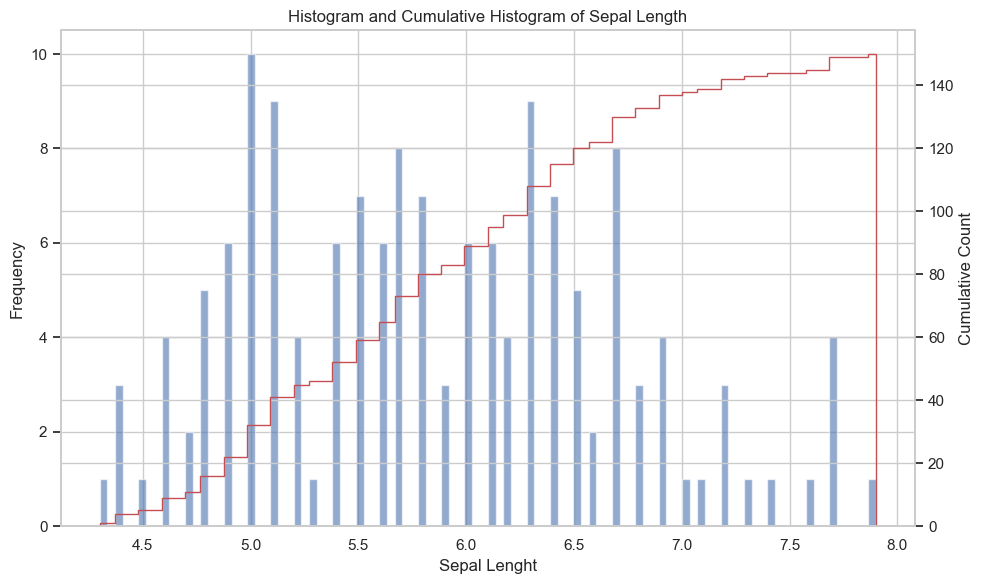

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))
# Histogram (counts)
n, bins, patches = ax.hist(df3.sepal_length, 
                           bins=100, 
                           density=False, 
                           alpha=0.6, 
                           color='b')
ax.set_xlabel('Sepal Lenght')
ax.set_ylabel('Frequency')

# Cummulative histogram (step plot)
ax2 = ax.twinx()
n2, bins2, patches2 = ax2.hist(df3.sepal_length, 
                               cumulative=True, 
                               bins=100, 
                               histtype='step', 
                               density=False, 
                               color='r')
ax2.set_ylabel('Cumulative Count')
plt.title('Histogram and Cumulative Histogram of Sepal Length')
plt.tight_layout()
plt.show()

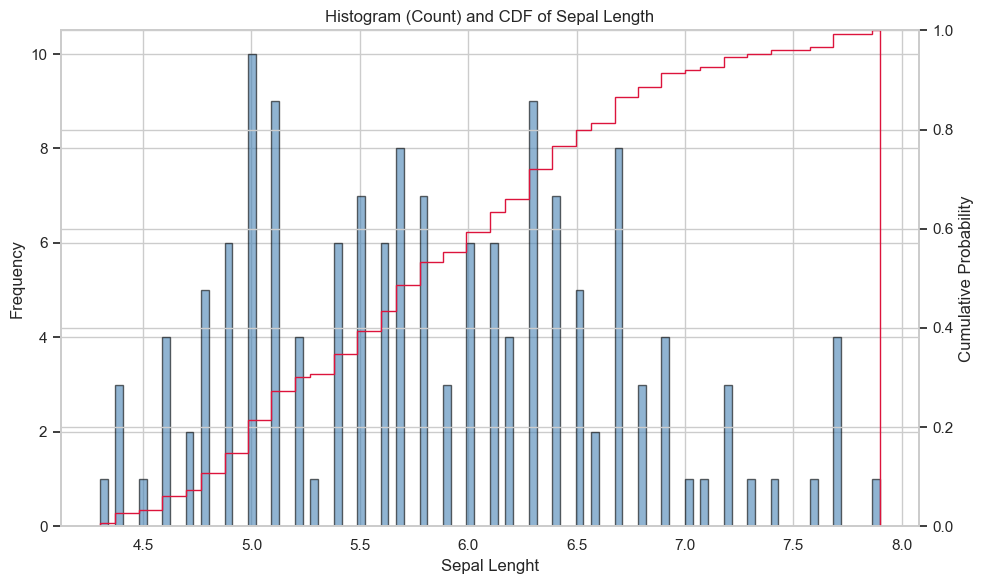

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))
# Histogram (counts)
n, bins, patches = ax.hist(df3.sepal_length, 
                           bins=100, 
                           density=False, 
                           alpha=0.6, 
                           color='steelblue', edgecolor='black')
ax.set_xlabel('Sepal Lenght')
ax.set_ylabel('Frequency')

# Cummulative distribution function (step plot)
ax2 = ax.twinx()
n2, bins2, patches2 = ax2.hist(df3.sepal_length, 
                               cumulative=True, 
                               bins=100, 
                               histtype='step', 
                               density=True, # normalize to [0,1]
                               color='crimson')
ax2.set_ylabel('Cumulative Probability')
ax2.set_ylim(0,1)
plt.title('Histogram (Count) and CDF of Sepal Length')
plt.tight_layout()
plt.show()

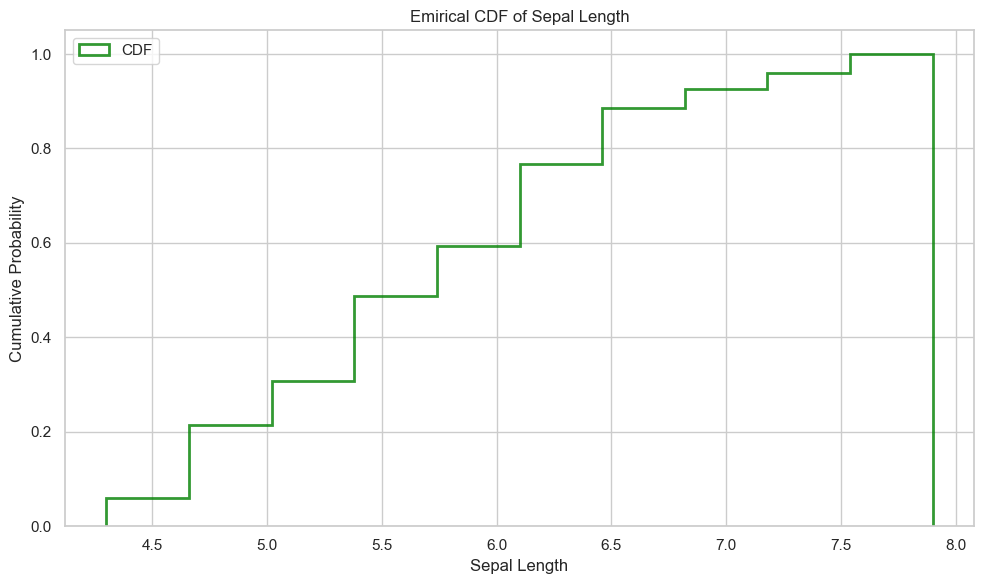

In [46]:
# Cumulative histogram (counts)
plt.figure(figsize=(10,6))

plt.hist(df3.sepal_length, 
         cumulative=True, 
         density=True,
         label='CDF', 
         histtype='step', 
         alpha=0.8, 
         color='green', 
         linewidth=2)
plt.xlabel('Sepal Length')
plt.ylabel('Cumulative Probability')
plt.title('Emirical CDF of Sepal Length')
plt.legend()
plt.tight_layout()
plt.show()

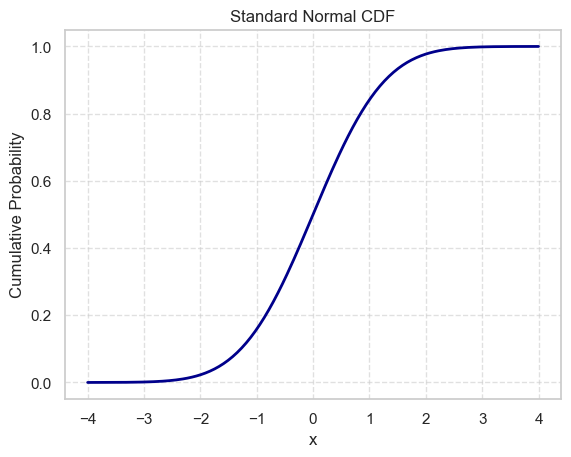

In [47]:
# Define the domain (x values)
norm1 = np.linspace(-4, 4, 200)

# Standard normal CDF
cdf = stats.norm.cdf(norm1)

plt.plot(norm1, cdf, color='darkblue', linewidth=2)
plt.title('Standard Normal CDF')
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

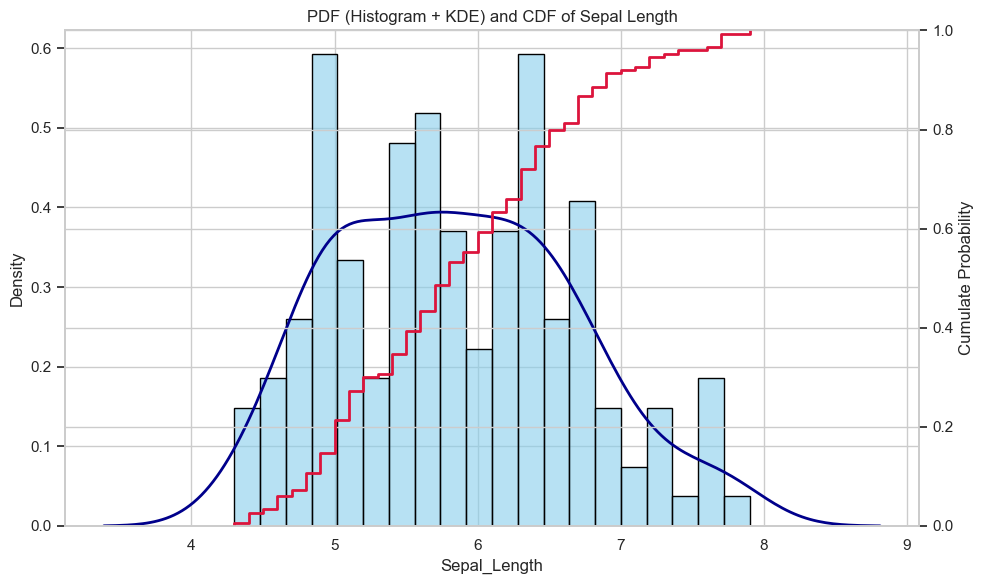

In [48]:
# Histogram + KDE (emperical PDE estimate)
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(df3.sepal_length, 
             bins=20, 
             stat='density', 
             color='skyblue', 
             edgecolor='black', 
             alpha=0.6, 
             ax=ax)
sns.kdeplot(df3.sepal_length, 
            color='darkblue', 
            linewidth=2, 
            ax=ax)

ax.set_xlabel('Sepal_Length')
ax.set_ylabel('Density')

# Emirical CDF on righ axis
ax = ax.twinx()
sns.ecdfplot(df3.sepal_length, color='crimson', linewidth=2, ax=ax)
ax.set_ylabel('Cumulate Probability')
ax.set_ylim(0,1)

plt.title('PDF (Histogram + KDE) and CDF of Sepal Length')
plt.tight_layout()
plt.show()